Result: y = 2.9025670755800432e-18 + 0.8430585293759556 x + 6.440359356929808e-18 x^2 + -0.09138419906371861 x^3


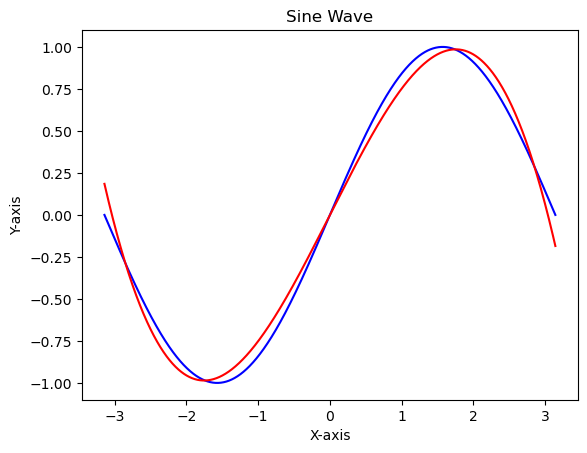

CPU times: user 2.57 s, sys: 179 ms, total: 2.75 s
Wall time: 1.95 s


In [2]:
%%time
# -*- gradient descent from P5 onto sin(x) using numpy only -*-
import numpy as np
import math
import matplotlib.pyplot as plt

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# initialize weights
a = 0
b = 0
c = 0
d = 0

learningRate = 1e-7
for t in range(20000):
    # Forward pass: compute predicted y
    y_pred = a + b*x + c*x**2 + d*x**3

    grad_y_pred = 2.0 * (y_pred - y) 
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights

    a -= grad_a * learningRate
    b -= grad_b * learningRate
    c -= grad_c * learningRate
    d -= grad_d * learningRate

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

# Create a line plot for the second dataset (y2) and specify a different style
plt.plot(x, y_pred, label='Prediction', color='red', linestyle='-')


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sine Wave")

plt.show()


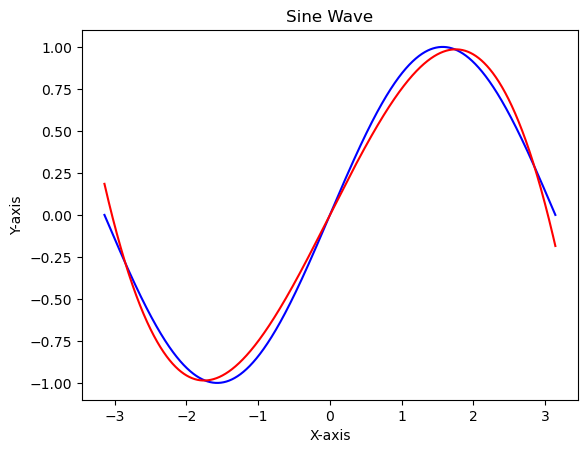

In [3]:

# - same problem using tensors in pytorch -
import torch
import math
import matplotlib.pyplot as plt


dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device = device, dtype = dtype)
y = torch.sin(x)

a = 0
b = 0
c = 0
d = 0


learningRate = 1e-6

for t in range(2000):
    y_pred2 = a + b*x + c*x**2 + d*x**3

    #Backpropagation step - take the derivative of the loss function obtain the gradient constant vector
    grad_y_pred = 2.0 * (y_pred2 - y) 
    # what is y_pred - y actually doing? it generates a linspace (1D vector) 
    # that represnets the discrete differences between the points of y_pred (the polynomial) and y
    # using a differnece formula derived from our loss function of choice.
    # the sum of the difference is the net difference between the two functions. 
    
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    
    # now we need to update the coefficients of y_pred based on the gradient vector.
    # we have made 4 different constants that correspond to the gradient in the 4 dimensions of the polynomial.
    # for example, grad_b represents the grad vector scaled by a factor of x, and grad_d is the grad vector scaled by a factor of x^3 (x^3 is multiplied by the grad vector at each point)
    # looking at x^3 -> when x^3 is greater, grad_d is scaled larger at that point. 
    
    a -= grad_a * learningRate
    b -= grad_b * learningRate
    c -= grad_c * learningRate
    d -= grad_d * learningRate
    

plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

# Create a line plot for the second dataset (y2) and specify a different style
plt.plot(x, y_pred2, label='Prediction', color='red', linestyle='-')


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sine Wave")

plt.show()


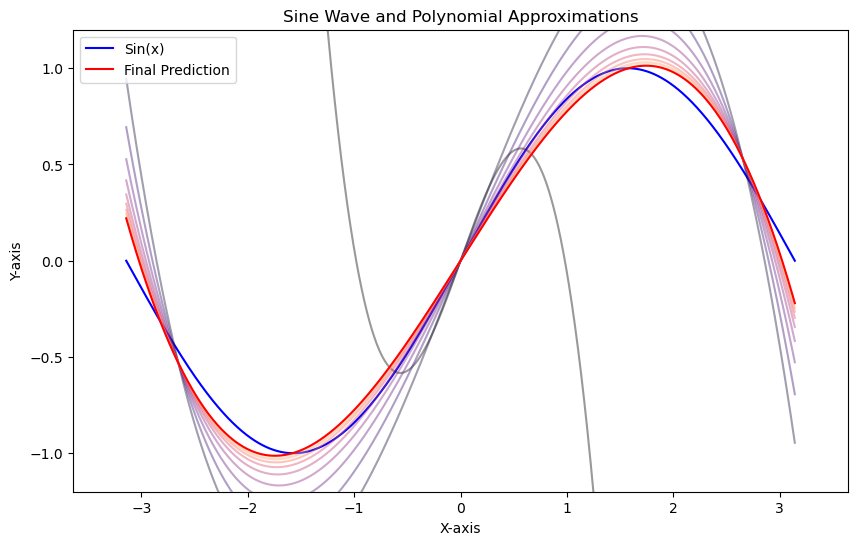

0 + 0.8709012866020203x + 0x^2 + -0.09534458816051483x^3 + 0x^4 + 39.37019348144531x^5


In [3]:
# visualizing the descent onto sin(x)#

import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)
y_taylor = x - (x**3)/6 + (x**5)/120
a = 0
b = torch.randn((), device=device, dtype=dtype)
c = 0
d = torch.randn((), device=device, dtype=dtype)
e = 0
f = torch.randn((), device=device, dtype=dtype)

learningRate = 1e-6
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningAmount = 2000
for t in range(learningAmount):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Save y_pred every 200 iterations
    if t % (learningAmount/10) == 0:
        y_pred_snapshots.append(y_pred.clone())  # Clone to save the current state

    grad_y_pred = 2.0 * (y_pred - y)
    #grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    #grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    #grad_e = (grad_y_pred * x ** 4).sum()
    grad_f = (grad_y_pred * x ** 5).sum()

    #a -= grad_a * learningRate
    b -= grad_b * learningRate
    #c -= grad_c * learningRate
    d -= grad_d * learningRate
    #e -= grad_e * learningRate
    f -= grad_f * learningRate

# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-math.pi - 0.5, math.pi + 0.5])
plt.ylim([-1.2, 1.2])

plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.4)

# Plot the final prediction
plt.plot(x, y_pred, label='Final Prediction', color='red', linestyle='-')


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sine Wave and Polynomial Approximations")
plt.legend()
plt.show()
print(f'{a} + {b}x + {c}x^2 + {d}x^3 + {e}x^4 + {f}x^5')

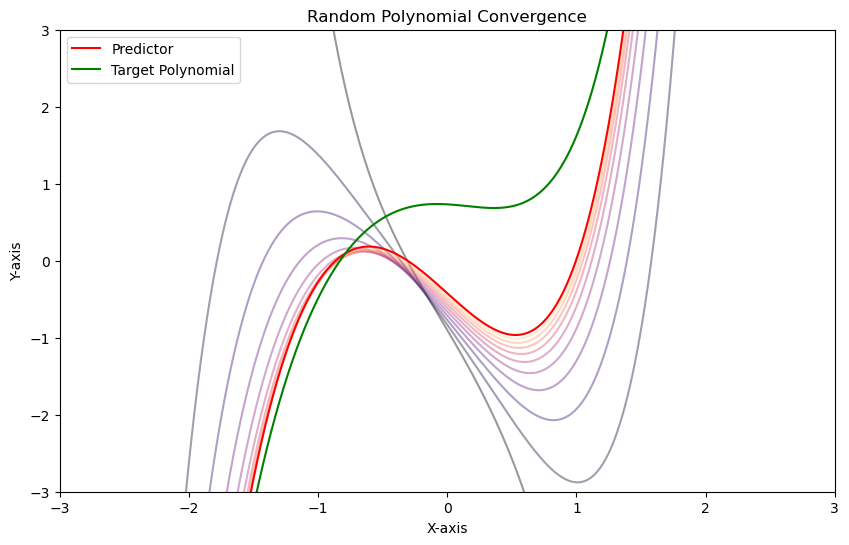

In [4]:
# converging a random polynomial towards another #
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)


ar = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
br = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
cr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
dr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
er = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
fr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
y_random = ar + br*x + cr*x**2 + dr*x**3 + er*x**4 + fr*x**5


a = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
c = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
e = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
f = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# torch.randn((), device=device, dtype=dtype)

learningRate = 1e-8
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningAmount = 20000
min_value = -3
max_value = 3
for t in range(learningAmount):
    y_pred = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

    # Save y_pred every 200 iterations
    if t % (learningAmount / 10) == 0:
        y_pred_snapshots.append(y_pred.clone())  # Clone to save the current state

    grad_y_pred = 2.0 * (y_pred - y_random)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()
    grad_f = (grad_y_pred * x ** 5).sum()

    a = (a - grad_a * learningRate).clamp(min_value, max_value)
    b = (b - grad_b * learningRate).clamp(min_value, max_value)
    c = (c - grad_c * learningRate).clamp(min_value, max_value)
    d = (d - grad_d * learningRate).clamp(min_value, max_value)
    e = (e - grad_e * learningRate).clamp(min_value, max_value)
    f = (f - grad_f * learningRate).clamp(min_value, max_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-3, 3])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.4)

# Plot the final prediction
plt.plot(x, y_pred, label='Predictor', color='red', linestyle='-')

# Plot the taylor approximation
plt.plot(x, y_random, label='Target Polynomial', color='green', linestyle='-')

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Random Polynomial Convergence")
plt.legend()
plt.show()

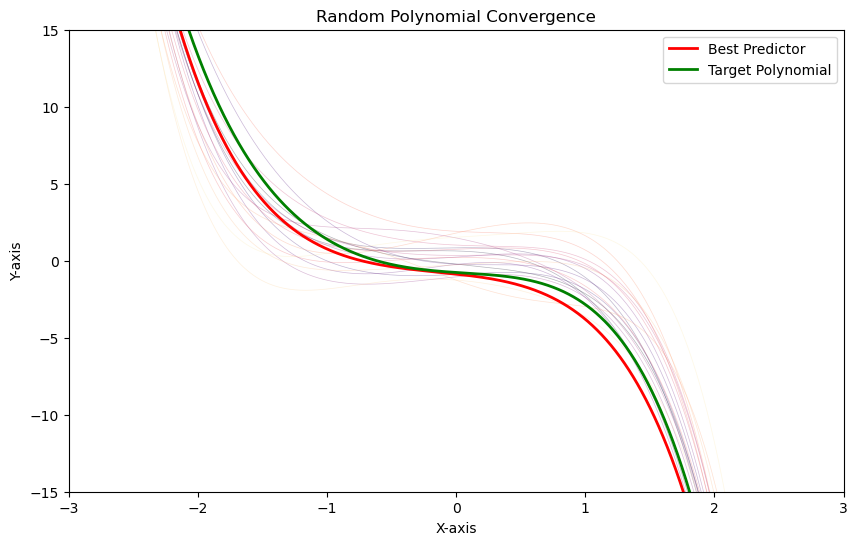

tensor(0.8572)
CPU times: user 5.29 s, sys: 375 ms, total: 5.66 s
Wall time: 4.22 s


In [5]:
%%time
# same problem as above, but showing the various local minima of the sub-optimal runtime gradient function#
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)
learningRange = 20
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningRate = 1e-8
learningAmount = 1000
min_value = -3
max_value = 3


ar = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
br = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
cr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
dr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
er = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
fr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
y_random = ar + br*x + cr*x**2 + dr*x**3 + er*x**4 + fr*x**5


for n in range(learningRange):
    
    a = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    c = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    e = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    f = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    # torch.randn((), device=device, dtype=dtype)

    
    for t in range(learningAmount):
        y_pred = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

        grad_y_pred = 2.0 * (y_pred - y_random)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()
        grad_e = (grad_y_pred * x ** 4).sum()
        grad_f = (grad_y_pred * x ** 5).sum()

        a = (a - grad_a * learningRate).clamp(min_value, max_value)
        b = (b - grad_b * learningRate).clamp(min_value, max_value)
        c = (c - grad_c * learningRate).clamp(min_value, max_value)
        d = (d - grad_d * learningRate).clamp(min_value, max_value)
        e = (e - grad_e * learningRate).clamp(min_value, max_value)
        f = (f - grad_f * learningRate).clamp(min_value, max_value)

    y_pred_snapshots.append(y_pred.clone())
    
    
currDist = 10e50  
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    if ((y_pred_snapshot - y_random) ** 2).sum() <= currDist:
        y_pred = y_pred_snapshot
        currDist = ((y_pred_snapshot - y_random) ** 2).sum()
    
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-15, 15])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Pair each snapshot with its sum of squared differences
snapshot_diff_pairs = [(snapshot, ((snapshot - y_random) ** 2).sum()) for snapshot in y_pred_snapshots]

# Sort the pairs based on the sum of squared differences
sorted_snapshots = sorted(snapshot_diff_pairs, key=lambda pair: pair[1])

# Extract the sorted y_pred_snapshots
sorted_y_pred_snapshots = [pair[0] for pair in sorted_snapshots]

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(sorted_y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.3, linewidth = 0.5)

# Plot the final prediction
plt.plot(x, y_pred, label='Best Predictor', color='red', linestyle='-', linewidth = 2)

# Plot the taylor approximation
plt.plot(x, y_random, label='Target Polynomial', color='green', linestyle='-', linewidth = 2)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Random Polynomial Convergence")
plt.legend()
plt.show()

normedLinDist = ((abs(y_pred - y_random)).sum())/(x.size(0))
print(normedLinDist)

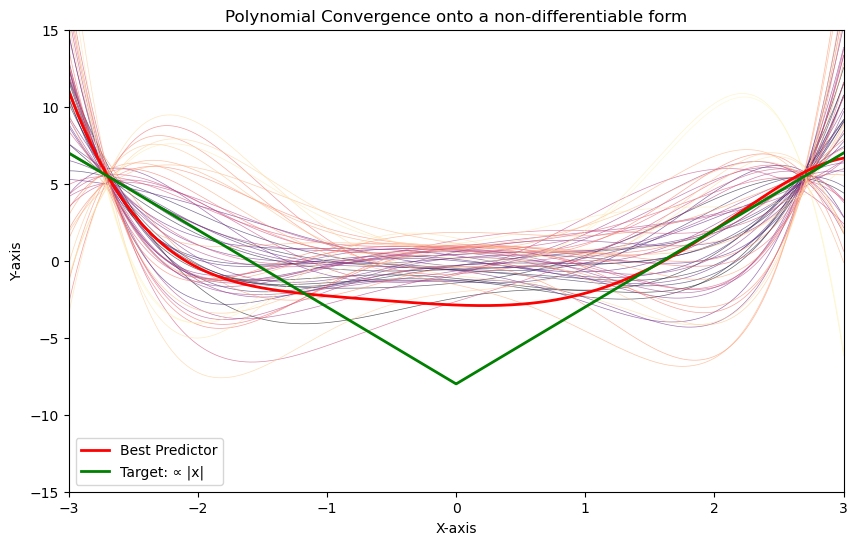

tensor(1.5264)
CPU times: user 14.1 s, sys: 501 ms, total: 14.6 s
Wall time: 12.6 s


In [7]:
%%time
# showing the various local minima of gradient descent towards a non-differentiable function, starting with random points#
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)
learningRange = 60
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningRate = 1e-8
learningAmount = 1000

y_random = 5 * abs(x) - 8


for n in range(learningRange):
    
    a = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    c = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    e = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    f = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    torch.randn((), device=device, dtype=dtype)

    
    for t in range(learningAmount):
        y_pred = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

        grad_y_pred = 2.0 * (y_pred - y_random)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()
        grad_e = (grad_y_pred * x ** 4).sum()
        grad_f = (grad_y_pred * x ** 5).sum()

        a = (a - grad_a * learningRate).clamp(min_value, max_value)
        b = (b - grad_b * learningRate).clamp(min_value, max_value)
        c = (c - grad_c * learningRate).clamp(min_value, max_value)
        d = (d - grad_d * learningRate).clamp(min_value, max_value)
        e = (e - grad_e * learningRate).clamp(min_value, max_value)
        f = (f - grad_f * learningRate).clamp(min_value, max_value)

    y_pred_snapshots.append(y_pred.clone())
    
    
currDist = 10e50  
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    if ((y_pred_snapshot - y_random) ** 2).sum() <= currDist:
        y_pred = y_pred_snapshot
        currDist = ((y_pred_snapshot - y_random) ** 2).sum()
    
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-15, 15])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Pair each snapshot with its sum of squared differences
snapshot_diff_pairs = [(snapshot, ((snapshot - y_random) ** 2).sum()) for snapshot in y_pred_snapshots]

# Sort the pairs based on the sum of squared differences
sorted_snapshots = sorted(snapshot_diff_pairs, key=lambda pair: pair[1])

# Extract the sorted y_pred_snapshots
sorted_y_pred_snapshots = [pair[0] for pair in sorted_snapshots]

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(sorted_y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.6, linewidth = 0.5)

# Plot the final prediction
plt.plot(x, y_pred, label='Best Predictor', color='red', linestyle='-', linewidth = 2)

# Plot the taylor approximation
plt.plot(x, y_random, label='Target: ∝ |x|', color='green', linestyle='-', linewidth = 2)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polynomial Convergence onto a non-differentiable form")
plt.legend()
plt.show()

normedLinDist = ((abs(y_pred - y_random)).sum())/(x.size(0))
print(normedLinDist)

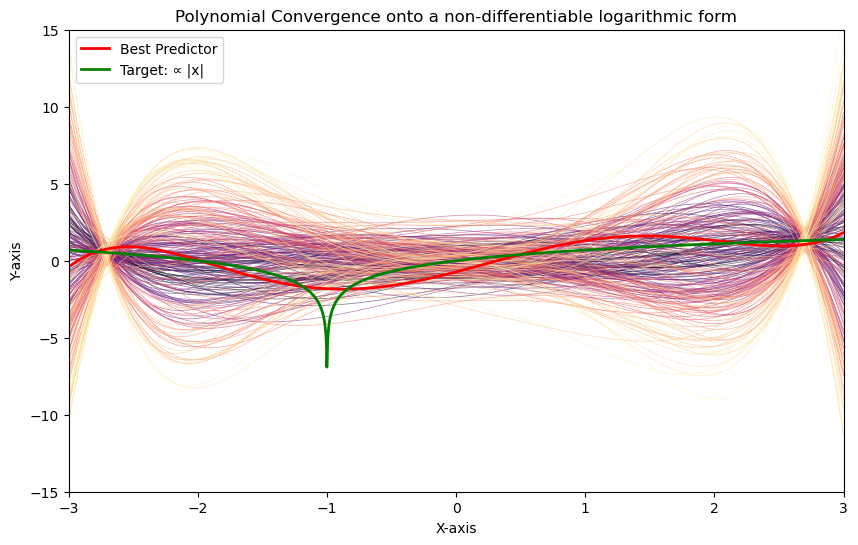

tensor(0.4562)
CPU times: user 50.2 s, sys: 499 ms, total: 50.7 s
Wall time: 48.8 s


In [11]:
%%time
# showing the various local minima of gradient descent towards a logarithmic function, starting with random points#
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)
learningRange = 240
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningRate = 1e-8
learningAmount = 1000

y_random = torch.log(abs(x + 1))


for n in range(learningRange):
    
    a = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    c = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    e = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    f = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    torch.randn((), device=device, dtype=dtype)

    
    for t in range(learningAmount):
        y_pred = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

        grad_y_pred = 2.0 * (y_pred - y_random)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()
        grad_e = (grad_y_pred * x ** 4).sum()
        grad_f = (grad_y_pred * x ** 5).sum()

        a = (a - grad_a * learningRate).clamp(min_value, max_value)
        b = (b - grad_b * learningRate).clamp(min_value, max_value)
        c = (c - grad_c * learningRate).clamp(min_value, max_value)
        d = (d - grad_d * learningRate).clamp(min_value, max_value)
        e = (e - grad_e * learningRate).clamp(min_value, max_value)
        f = (f - grad_f * learningRate).clamp(min_value, max_value)

    y_pred_snapshots.append(y_pred.clone())
    
    
currDist = 10e50  
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    if ((y_pred_snapshot - y_random) ** 2).sum() <= currDist:
        y_pred = y_pred_snapshot
        currDist = ((y_pred_snapshot - y_random) ** 2).sum()
    
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-15, 15])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Pair each snapshot with its sum of squared differences
snapshot_diff_pairs = [(snapshot, ((snapshot - y_random) ** 2).sum()) for snapshot in y_pred_snapshots]

# Sort the pairs based on the sum of squared differences
sorted_snapshots = sorted(snapshot_diff_pairs, key=lambda pair: pair[1])

# Extract the sorted y_pred_snapshots
sorted_y_pred_snapshots = [pair[0] for pair in sorted_snapshots]

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(sorted_y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.6, linewidth = 0.5)

# Plot the final prediction
plt.plot(x, y_pred, label='Best Predictor', color='red', linestyle='-', linewidth = 2)

# Plot the taylor approximation
plt.plot(x, y_random, label='Target: ∝ |x|', color='green', linestyle='-', linewidth = 2)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polynomial Convergence onto a non-differentiable logarithmic form")
plt.legend()
plt.show()

normedLinDist = ((abs(y_pred - y_random)).sum())/(x.size(0))
print(normedLinDist)

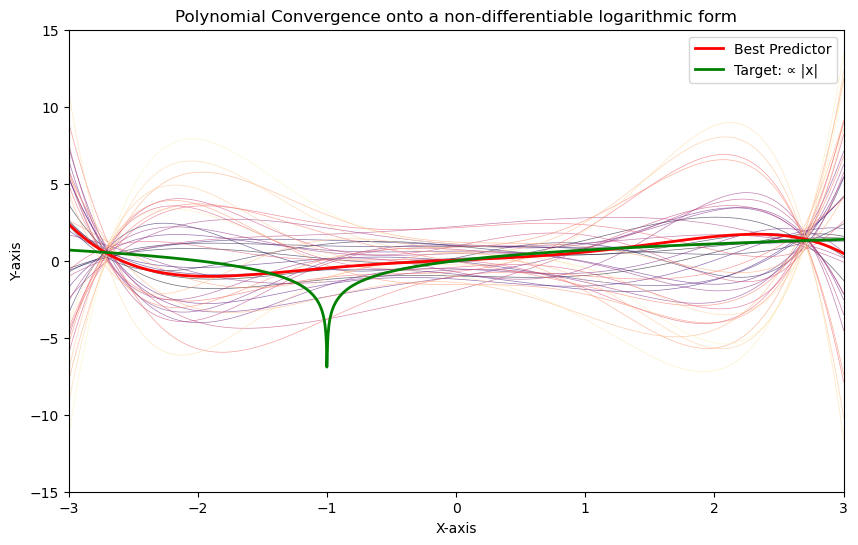

tensor(0.5318)
CPU times: user 9.43 s, sys: 326 ms, total: 9.75 s
Wall time: 8.46 s


In [12]:
%%time
# showing the various local minima of gradient descent towards a logarithmic function, starting with random points#
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")
min_value = -15
max_value = 15

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)
learningRange = 40
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningRate = 1e-8
learningAmount = 1000

y_random = torch.log(abs(x + 1))


for n in range(learningRange):
    
    a = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    c = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    e = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    f = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    torch.randn((), device=device, dtype=dtype)

    
    for t in range(learningAmount):
        y_pred = a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

        grad_y_pred = 2.0 * (y_pred - y_random)
        grad_a = grad_y_pred.sum()
        grad_b = (grad_y_pred * x).sum()
        grad_c = (grad_y_pred * x ** 2).sum()
        grad_d = (grad_y_pred * x ** 3).sum()
        grad_e = (grad_y_pred * x ** 4).sum()
        grad_f = (grad_y_pred * x ** 5).sum()

        a = (a - grad_a * learningRate).clamp(min_value, max_value)
        b = (b - grad_b * learningRate).clamp(min_value, max_value)
        c = (c - grad_c * learningRate).clamp(min_value, max_value)
        d = (d - grad_d * learningRate).clamp(min_value, max_value)
        e = (e - grad_e * learningRate).clamp(min_value, max_value)
        f = (f - grad_f * learningRate).clamp(min_value, max_value)

    y_pred_snapshots.append(y_pred.clone())
    
    
currDist = 10e50  
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    if ((y_pred_snapshot - y_random) ** 2).sum() <= currDist:
        y_pred = y_pred_snapshot
        currDist = ((y_pred_snapshot - y_random) ** 2).sum()
    
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-15, 15])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Pair each snapshot with its sum of squared differences
snapshot_diff_pairs = [(snapshot, ((snapshot - y_random) ** 2).sum()) for snapshot in y_pred_snapshots]

# Sort the pairs based on the sum of squared differences
sorted_snapshots = sorted(snapshot_diff_pairs, key=lambda pair: pair[1])

# Extract the sorted y_pred_snapshots
sorted_y_pred_snapshots = [pair[0] for pair in sorted_snapshots]

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(sorted_y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.6, linewidth = 0.5)

# Plot the final prediction
plt.plot(x, y_pred, label='Best Predictor', color='red', linestyle='-', linewidth = 2)

# Plot the taylor approximation
plt.plot(x, y_random, label='Target: ∝ |x|', color='green', linestyle='-', linewidth = 2)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polynomial Convergence onto a non-differentiable logarithmic form")
plt.legend()
plt.show()

normedLinDist = ((abs(y_pred - y_random)).sum())/(x.size(0))
print(normedLinDist)

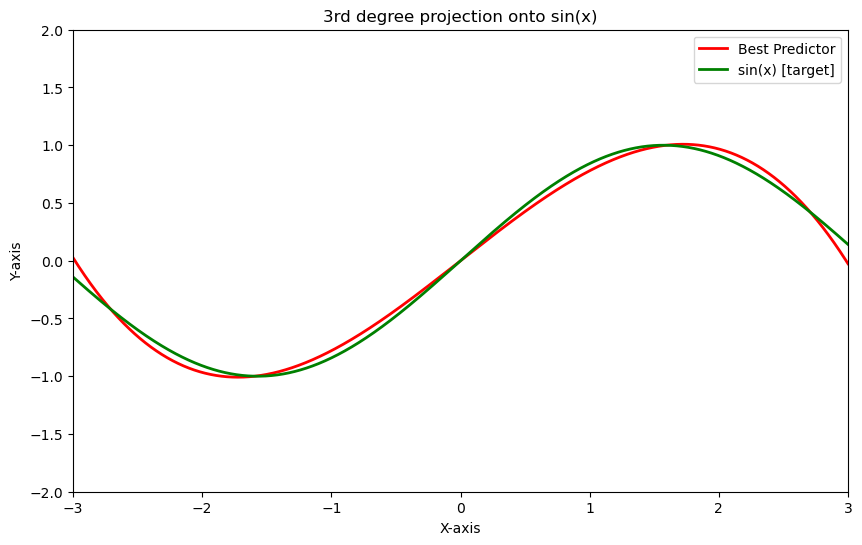

tensor(0.0475)


In [4]:
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)
learningRange = 10
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningRate = 1e-6
learningAmount = 10000
min_value = -3
max_value = 3


# ar = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# br = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# cr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# dr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# er = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# fr = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
# y_random = ar + br*x + cr*x**2 + dr*x**3 + er*x**4 + fr*x**5

y_random = torch.sin(x)


for n in range(learningRange):
    
    b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    
    d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    

    
    for t in range(learningAmount):
        y_pred = b*x + d*x**3

        grad_y_pred =  (y_pred - y_random) * 2

        grad_b = (grad_y_pred * x).sum()
        grad_d = (grad_y_pred * x ** 3).sum()


        b = (b - grad_b * learningRate)
        d = (d - grad_d * learningRate)

    y_pred_snapshots.append(y_pred.clone())
    
    
currDist = 10e50  
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    if ((y_pred_snapshot - y_random) ** 2).sum() <= currDist:
        y_pred = y_pred_snapshot
        currDist = ((y_pred_snapshot - y_random) ** 2).sum()
    
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-2, 2])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Pair each snapshot with its sum of squared differences
snapshot_diff_pairs = [(snapshot, ((snapshot - y_random) ** 2).sum()) for snapshot in y_pred_snapshots]

# Sort the pairs based on the sum of squared differences
sorted_snapshots = sorted(snapshot_diff_pairs, key=lambda pair: pair[1])

# Extract the sorted y_pred_snapshots
sorted_y_pred_snapshots = [pair[0] for pair in sorted_snapshots]

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(sorted_y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.3, linewidth = 0.5)

# Plot the final prediction
plt.plot(x, y_pred, label='Best Predictor', color='red', linestyle='-', linewidth = 2)

# Plot the taylor approximation
plt.plot(x, y_random, label='sin(x) [target]', color='green', linestyle='-', linewidth = 2)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("3rd degree projection onto sin(x)")
plt.legend()
plt.show()

normedLinDist = ((abs(y_pred - y_random)).sum())/(x.size(0))
print(normedLinDist)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.77 µs


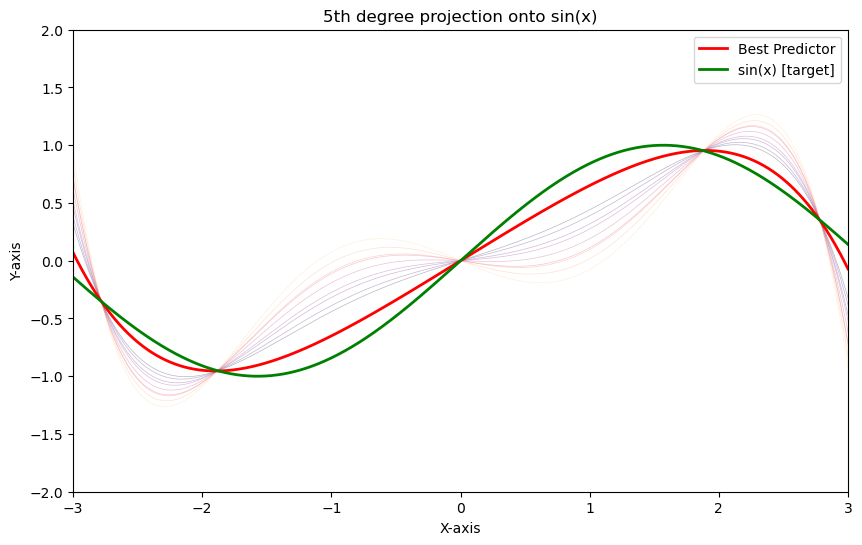

tensor(0.1048)


In [8]:
%time
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-3, 3, 2000, device=device, dtype=dtype)
learningRange = 10
y_pred_snapshots = []  # List to store y_pred at every 200 iterations
learningRate = 1e-8
learningAmount = 100000
min_value = -3
max_value = 3

y_random = torch.sin(x)


for n in range(learningRange):
    
    b = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    
    d = torch.randn((), device=device, dtype=dtype).clamp(-3, 3)
    
    f = torch.randn((), device = device, dtype=dtype).clamp(-3, 3)
    
    for t in range(learningAmount):
        y_pred = b*x + d*x**3 + f*x**5

        grad_y_pred =  (y_pred - y_random) * 2

        grad_b = (grad_y_pred * x).sum()
        grad_d = (grad_y_pred * x ** 3).sum()
        grad_f = (grad_y_pred * x ** 5).sum()


        b = (b - grad_b * learningRate)
        d = (d - grad_d * learningRate)
        f = (f - grad_f * learningRate)

    y_pred_snapshots.append(y_pred.clone())
    
    
currDist = 10e50  
for i, y_pred_snapshot in enumerate(y_pred_snapshots):
    if ((y_pred_snapshot - y_random) ** 2).sum() <= currDist:
        y_pred = y_pred_snapshot
        currDist = ((y_pred_snapshot - y_random) ** 2).sum()
    
# Plotting
plt.figure(figsize=(10, 6))
plt.xlim([-3, 3])
plt.ylim([-2, 2])

#plt.plot(x, y, label='Sin(x)', color='blue', linestyle='-')

cmap = cm.magma

# Pair each snapshot with its sum of squared differences
snapshot_diff_pairs = [(snapshot, ((snapshot - y_random) ** 2).sum()) for snapshot in y_pred_snapshots]

# Sort the pairs based on the sum of squared differences
sorted_snapshots = sorted(snapshot_diff_pairs, key=lambda pair: pair[1])

# Extract the sorted y_pred_snapshots
sorted_y_pred_snapshots = [pair[0] for pair in sorted_snapshots]

# Plot each y_pred snapshot
for i, y_pred_snapshot in enumerate(sorted_y_pred_snapshots):
    color = cmap(i / len(y_pred_snapshots))
    plt.plot(x, y_pred_snapshot, color=color, linestyle='-', alpha=0.3, linewidth = 0.5)

# Plot the final prediction
plt.plot(x, y_pred, label='Best Predictor', color='red', linestyle='-', linewidth = 2)

# Plot the taylor approximation
plt.plot(x, y_random, label='sin(x) [target]', color='green', linestyle='-', linewidth = 2)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("5th degree projection onto sin(x)")
plt.legend()
plt.show()

normedLinDist = ((abs(y_pred - y_random)).sum())/(x.size(0))
print(normedLinDist)

/Users/nicolasmorabito/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


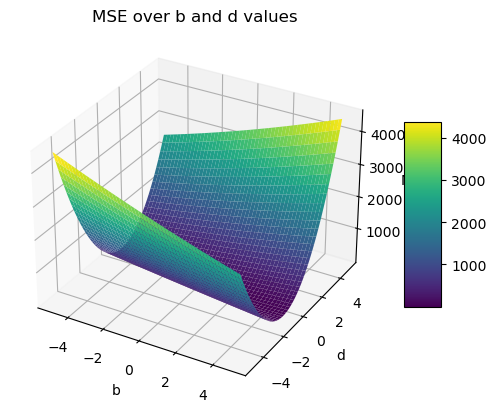

In [5]:
import torch
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

b = torch.linspace(-5, 5, 500)
d = torch.linspace(-5, 5, 500)
B, D = torch.meshgrid(b, d)

mse = torch.zeros(B.shape)

#compute MSE for each pair of b and d
for i in range(B.shape[0]) :
    for j in range(B.shape[1]):
        y_pred = B[i, j]*x  + D[i, j] * x**3
        mse[i,j] = torch.mean((y - y_pred) ** 2)
        
B_np = B.numpy()
D_np = D.numpy()
mse_np = mse.numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B_np, D_np, mse_np, cmap='viridis', edgecolor='none')

ax.set_xlabel('b')
ax.set_ylabel('d')
ax.set_zlabel('MSE')
ax.set_title('MSE over b and d values')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


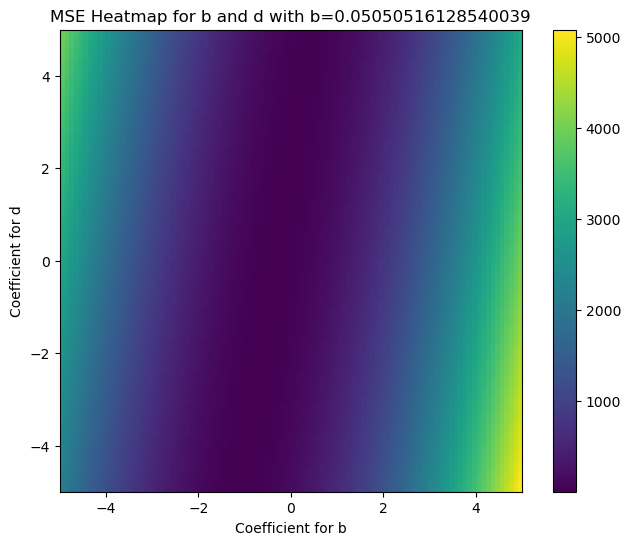

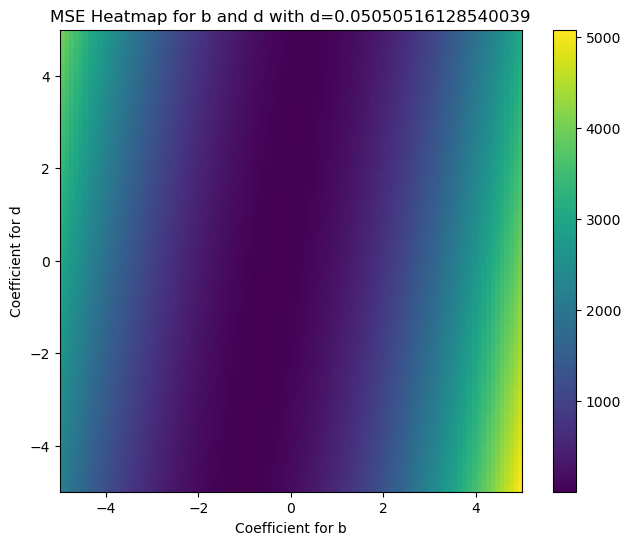

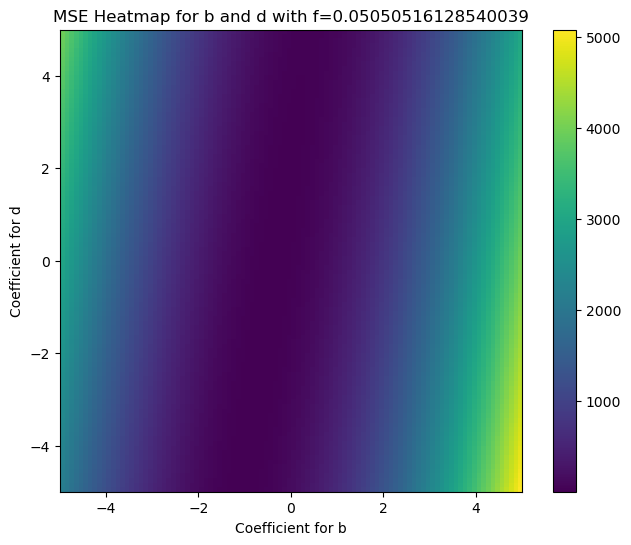

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Assuming device and dtype have been defined as before
device = torch.device("cpu")  # or 'cuda' if using GPU
dtype = torch.float

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Coefficients for x, x^3, and x^5
coeff_ranges = {
    'b': torch.linspace(-5, 5, 100, device=device, dtype=dtype),  # Coefficient for x
    'd': torch.linspace(-5, 5, 100, device=device, dtype=dtype),  # Coefficient for x^3
    'f': torch.linspace(-5, 5, 100, device=device, dtype=dtype)   # Coefficient for x^5
}

# Function to compute the polynomial
def compute_polynomial(x, b, d, f):
    return b*x + d*x**3 + f*x**5

# Function to plot heatmap
def plot_heatmap(coeff1, coeff2, fixed_coeff_value, fixed_coeff_name):
    C1, C2 = torch.meshgrid(coeff1, coeff2)
    mse = torch.zeros(C1.shape)
    
    # Compute MSE for each combination of b and d, with fixed f
    for i in range(C1.shape[0]):
        for j in range(C1.shape[1]):
            y_pred = compute_polynomial(x, C1[i, j], C2[i, j], fixed_coeff_value)
            mse[i, j] = torch.mean((y - y_pred) ** 2)
    
    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(mse.numpy(), cmap='viridis', extent=(coeff1.min(), coeff1.max(), coeff2.min(), coeff2.max()))
    plt.colorbar()
    plt.xlabel(f'Coefficient for {coeff_names[0]}')
    plt.ylabel(f'Coefficient for {coeff_names[1]}')
    plt.title(f'MSE Heatmap for {coeff_names[0]} and {coeff_names[1]} with {fixed_coeff_name}={fixed_coeff_value.item()}')
    plt.show()

# Names of the coefficients (for plotting)
coeff_names = list(coeff_ranges.keys())

# Plot heatmaps for each pair of coefficients
for i, coeff_name in enumerate(coeff_names):
    # Fix one coefficient and vary the other two
    fixed_coeff = coeff_ranges[coeff_name][50]  # Midpoint value as an example
    other_coeffs = [name for name in coeff_names if name != coeff_name]
    plot_heatmap(coeff_ranges[other_coeffs[0]], coeff_ranges[other_coeffs[1]], fixed_coeff, coeff_name)

